In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [26]:
import homework1

In [27]:
def testQ1():
    test_notes = ['A3', 'A2', 'C#4']
    for note in test_notes:
        print(homework1.note_name_to_frequency(note))

In [28]:
testQ1()

220.0
110.0
277.1826309768721


In [29]:
def vis(audio1, audio2, ran):
    plt.figure(figsize=(10, 4))
    plt.plot(audio1[:ran], label="Original", color='blue', alpha=0.6)
    plt.plot(audio2[:ran], label="Modified", color='orange', alpha=0.8)
    plt.legend()
    plt.show()

In [30]:
def testQ2():
    duration = 0.5 # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio = np.sin(2 * np.pi * 880 * t) # A5 tone

    faded_audio = homework1.decrease_amplitude(audio)
    
    vis(audio, faded_audio, 5000)

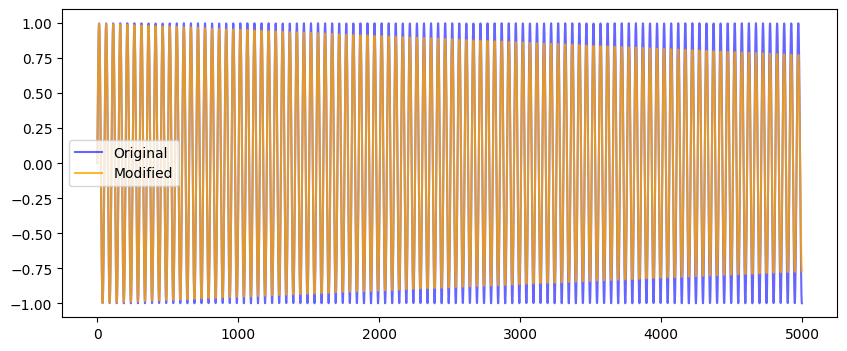

In [31]:
testQ2()

In [32]:
def testQ3():
    duration = 1.0  # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio = np.sin(2 * np.pi * 880 * t)  # A5 tone

    delayed_audio = homework1.add_delay_effects(audio)
    
    vis(audio, delayed_audio, 5000)

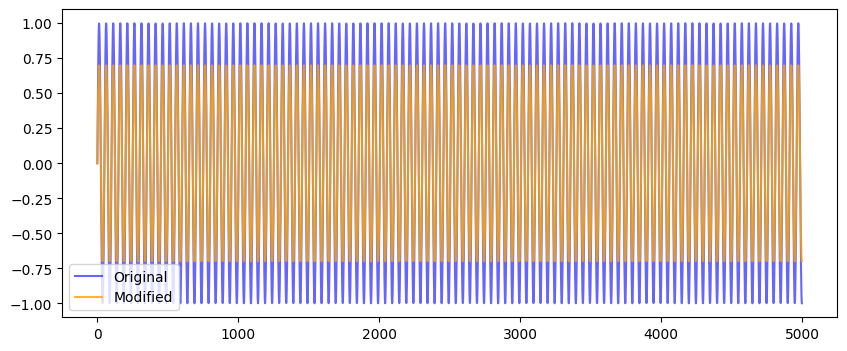

In [33]:
testQ3()

In [34]:
def testQ4a():
    duration = 0.5 # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio1 = np.sin(2 * np.pi * 220 * t) # A3 tone
    audio2 = np.sin(2 * np.pi * 880 * t) # A5 tone

    concat_audio = homework1.concatenate_audio([audio1, audio2])
    
    # Visualize here...

In [35]:
testQ4a()

In [36]:
def testQ4b():
    duration = 0.8  # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio1 = np.sin(2 * np.pi * 220 * t) # A3 tone
    audio2 = np.sin(2 * np.pi * 440 * t) # A4 tone

    mix_audio = homework1.mix_audio([audio1, audio2], [0.2, 0.8])
    
    # Visualize here...

In [37]:
testQ4b()

In [38]:
def testQ5():
    yours = homework1.create_sawtooth_wave(440, 2.0, 22050)
    
    plt.figure(figsize=(10, 4))
    plt.plot(yours[:5000], label="sawtooth", color='blue', alpha=0.6)
    plt.show()

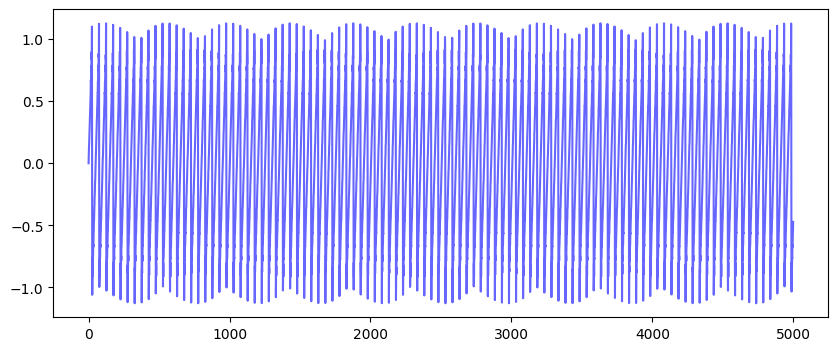

In [39]:
testQ5()

In [40]:
def testQ6():
    piano_files, drum_files = homework1.get_file_lists()
    
    yours = list(homework1.get_stats(piano_files[:2], drum_files[:2]).values())
    
    print(yours) # Should be a list of length 4

In [41]:
testQ6()

[2, 2, np.float64(256.3090909090909), np.float64(238.84545454545454)]


In [42]:
def testQ7():
    piano_files, drum_files = homework1.get_file_lists()

    yours = []
    
    for file_path in piano_files[:2]:
        yours.append(homework1.get_lowest_pitch(file_path))
    
    for file_path in piano_files[:2]:
        yours.append(homework1.get_highest_pitch(file_path))
        
    for file_path in piano_files[:2]:
        yours.append(homework1.get_unique_pitch_num(file_path))
    
    print(yours)

In [43]:
testQ7()

[None, None, None, None, None, None]


In [44]:
def testQ8():
    piano_files, drum_files = homework1.get_file_lists()

    yours = []

    for file_path in piano_files[:5]:
        yours.append(homework1.get_average_pitch_value(file_path))
    
    print(yours)

In [45]:
testQ8()

[None, None, None, None, None]


In [46]:
def train(feat): # Feat specifies which feature function will be used (i.e., featureQ9 or featureQ10)
    piano_paths, drum_paths = homework1.get_file_lists()
    piano_paths, drum_paths = piano_paths[:100], drum_paths[:100]
    
    X = []
    y = []
    
    for p in piano_paths:
        X.append(feat(p))
        y.append(1)
    for p in drum_paths:
        X.append(feat(p))
        y.append(0)
    
    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    
    return sum(y_pred == y_test) / len(y_test) # Accuracy

In [47]:
def testQ9():
    yours = train(homework1.featureQ9)
    print("Accuracy = " + str(yours))

In [48]:
testQ9()

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
def testQ10():
    yours9 = train(homework1.featureQ9)
    yours10 = train(homework1.featureQ10)
    print("Q9 accuracy = " + str(yours9) + ", Q10 accuracy = " + str(yours10))

In [ ]:
testQ10()